In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate, ShuffleSplit

In [2]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/diamond_pricing.csv'
df = pd.read_csv(url)
df.head()

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339


In [3]:
# divide data into input and output (X,y)
X = df.drop('Price', axis=1)
y = df['Price']

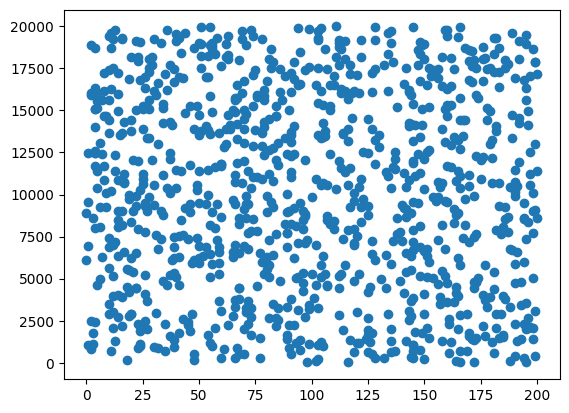

In [4]:
plt.scatter('Paleonium', 'Pressure', data=X)

In [5]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# metrics
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MSE 16237.842769958475
MAE 94.414319336685
R2 0.9623242507787384


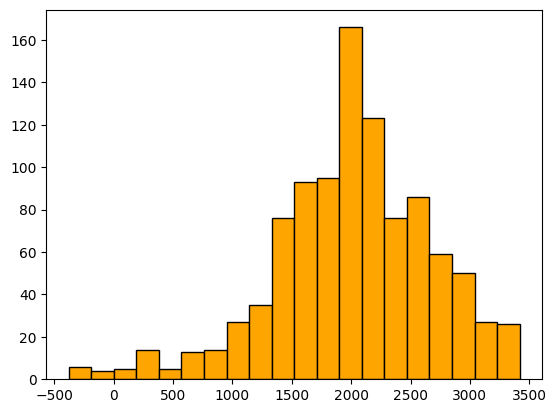

In [6]:
plt.hist(y, bins=20,edgecolor='black', color='orange')
plt.show()

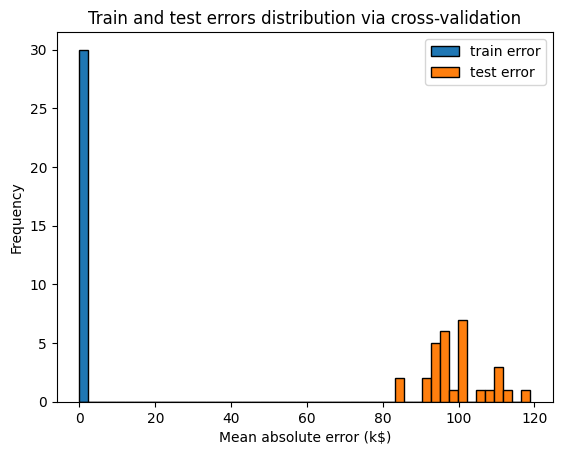

In [7]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(
    model,
    X,
    y,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
    n_jobs=-1,
)
cv_results = pd.DataFrame(cv_results)
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]
]
scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")

# model overfitting, not good to use

CPU times: total: 15.6 ms
Wall time: 3.67 s


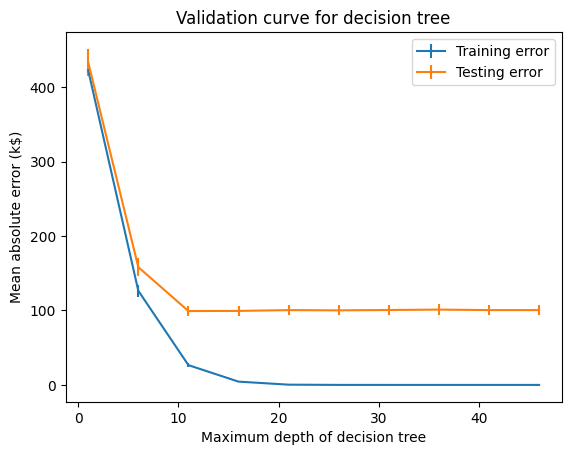

In [8]:
%%time
from sklearn.model_selection import validation_curve

max_depth = list(range(1, 50, 5))
train_scores, test_scores = validation_curve(
    model,
    X,
    y,
    param_name="max_depth",
    param_range=max_depth,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)
train_errors, test_errors = -train_scores, -test_scores
plt.errorbar(
    max_depth,
    train_errors.mean(axis=1),
    yerr=train_errors.std(axis=1),
    label="Training error",
)
plt.errorbar(
    max_depth,
    test_errors.mean(axis=1),
    yerr=test_errors.std(axis=1),
    label="Testing error",
)
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

In [9]:
model = DecisionTreeRegressor(max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# metrics
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MSE 18666.325612565724
MAE 100.66629515217494
R2 0.9566895792363164


In [10]:
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss usi

# grid search

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [13]:
param_grid = {
    'max_depth': list(range(2, 25)),
    'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
    'min_samples_split' : list(range(2, 5)),
}
model = DecisionTreeRegressor()
cv = ShuffleSplit(n_splits=10, test_size=0.2)
grid = GridSearchCV(
    estimator=model,
    param_grid =param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=cv,
    verbose=1,
)   

In [14]:
# parameters
grid.fit(X_train, y_train)

Fitting 10 folds for each of 276 candidates, totalling 2760 fits


c:\Users\ZAID\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
690 fits failed out of a total of 2760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
690 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ZAID\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ZAID\miniconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ZAID\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 1320, in fit
    super()._fit(
  File "c:\Users\ZAID\miniconda3\lib\site-packages\

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24],
                         'min_samples_split': [2, 3, 4]},
             scoring='neg_mean_absolute_error', verbose=1)

In [15]:
grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 13, 'min_samples_split': 3}

In [16]:
result = pd.DataFrame(grid.cv_results_)
result.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
103,0.006860,0.001851,0.003475,0.000694,friedman_mse,13,3,"{'criterion': 'friedman_mse', 'max_depth': 13,...",-100.810277,-113.880335,...,-93.103785,-89.577852,-87.919270,-96.370026,-100.770613,-102.646163,-99.518620,-99.800075,8.340923,1
34,0.005164,0.000500,0.002509,0.000387,squared_error,13,3,"{'criterion': 'squared_error', 'max_depth': 13...",-103.293126,-109.785487,...,-95.652426,-94.127075,-90.700759,-103.849306,-95.065011,-100.179779,-94.075035,-99.881387,6.831583,2
172,0.025200,0.007170,0.002355,0.000450,absolute_error,13,3,"{'criterion': 'absolute_error', 'max_depth': 1...",-98.206764,-106.531519,...,-105.924146,-101.654311,-98.442313,-101.813501,-102.172193,-92.335748,-101.673842,-100.426283,4.171825,3
99,0.006917,0.001660,0.002460,0.000761,friedman_mse,12,2,"{'criterion': 'friedman_mse', 'max_depth': 12,...",-104.492730,-106.106934,...,-101.523873,-89.348788,-95.197086,-95.393331,-99.777854,-102.653255,-101.564694,-100.548227,5.593547,4
178,0.022045,0.005569,0.003959,0.003381,absolute_error,15,3,"{'criterion': 'absolute_error', 'max_depth': 1...",-97.311212,-101.553087,...,-106.256163,-106.241511,-100.202815,-99.315926,-105.663542,-94.870605,-99.848625,-100.864105,3.821864,5
35,0.005970,0.002303,0.002609,0.000778,squared_error,13,4,"{'criterion': 'squared_error', 'max_depth': 13...",-103.726520,-114.672767,...,-98.995552,-93.455247,-86.531894,-98.247801,-99.279515,-107.323414,-101.059510,-100.876678,7.314637,6
173,0.022950,0.010900,0.004655,0.006393,absolute_error,13,4,"{'criterion': 'absolute_error', 'max_depth': 1...",-96.057203,-106.800895,...,-110.161740,-101.764564,-100.111378,-99.261605,-103.832672,-93.831059,-100.273119,-100.950939,4.681757,7
102,0.005820,0.000895,0.002808,0.000458,friedman_mse,13,2,"{'criterion': 'friedman_mse', 'max_depth': 13,...",-105.617114,-107.285353,...,-98.852403,-90.954311,-93.649024,-96.630996,-98.742812,-104.712878,-103.097629,-100.957626,5.868111,8
106,0.006229,0.001307,0.002658,0.000674,friedman_mse,14,3,"{'criterion': 'friedman_mse', 'max_depth': 14,...",-105.046700,-112.104094,...,-101.273777,-92.062530,-96.625840,-102.993606,-94.984601,-103.086583,-97.612602,-101.038556,5.546728,9
104,0.006367,0.001551,0.002868,0.001093,friedman_mse,13,4,"{'criterion': 'friedman_mse', 'max_depth': 13,...",-102.827264,-112.822508,...,-98.819927,-91.123139,-86.943156,-97.477263,-104.353977,-105.956289,-101.854883,-101.167244,7.508888,10


In [17]:
final_model = DecisionTreeRegressor(**grid.best_params_)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
# metrics
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MSE 16123.144986216284
MAE 93.58939910668087
R2 0.9625903775664973


In [19]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
df.head(2)

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
reg2 = RandomForestRegressor(max_depth=10)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
# metrics
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MSE 8069.28439572745
MAE 71.62578448585576
R2 0.9812772952912855


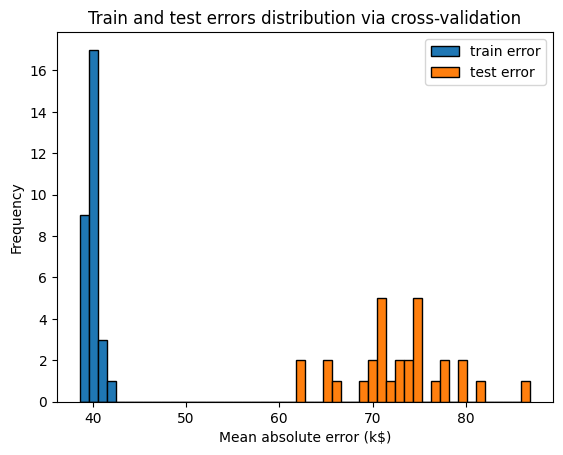

In [32]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)
model = RandomForestRegressor(max_depth=10)
cv_results = cross_validate(
    model,
    X,
    y,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
    n_jobs=-1,
)
cv_results = pd.DataFrame(cv_results)
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]
]
scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")

CPU times: total: 0 ns
Wall time: 42.2 s


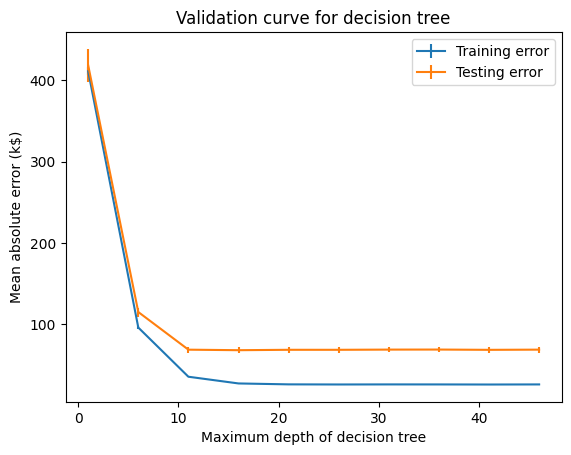

In [29]:
%%time
from sklearn.model_selection import validation_curve

max_depth = list(range(1, 50, 5))
model = RandomForestRegressor()
train_scores, test_scores = validation_curve(
    model,
    X,
    y,
    param_name="max_depth",
    param_range=max_depth,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)
train_errors, test_errors = -train_scores, -test_scores
plt.errorbar(
    max_depth,
    train_errors.mean(axis=1),
    yerr=train_errors.std(axis=1),
    label="Training error",
)
plt.errorbar(
    max_depth,
    test_errors.mean(axis=1),
    yerr=test_errors.std(axis=1),
    label="Testing error",
)
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")